AutoregressionAD detects anomalous changes of autoregressive behavior in time series

AutoregressionAD` can capture changes of autoregressive relationship (the relationship between a data point and points in its near past) and could be used for cyclic (but not seasonal) series in some situations.

A seasonal series always has a fixed, usually interpretable and known, period because of its seasonal nature. A cyclic time series does not follow a fixed periodic pattern because of its physics nature, even if it appears repeating similar subseries. For example, the trajectory of a moving part in rotating equipment is a 3-D cyclic time series, whose cycle length depends on rotation speed and is not necessarily fixed. Applying seasonality decomposition to it would be problematic, because every cycle may last a slightly different length, and decomposition residuals will be misleading for anomaly detection purpose.

Documentation: https://adtk.readthedocs.io/en/stable/notebooks/demo.html#AutoregressionAD

import dependencies 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

read the csv. The data here is just 

In [8]:
s = pd.read_csv('./sample_data/cpu.csv')
s.head()

,timestamp,value,label
0,1469376000,0.847300,0
1,1469376300,-0.036137,0
2,1469376600,0.074292,0
3,1469376900,0.074292,0
4,1469377200,-0.036137,0


data preparation, which includes: 1. dropping an extraneous column, 'label'.  2. converting the timestamp to a pandas datetime object 3. Setting the timestamp column as the index. The ADTK library specifies that the timestamps must be a datatime object and set as the data frame index. 

In [3]:
s.drop(['label'], axis=1, inplace=True)
s["timestamp"] = pd.to_datetime(s["timestamp"], unit='s')
s = s.set_index("timestamp")
s.head()

,value
timestamp,
2016-07-24 16:00:00,0.847300
2016-07-24 16:05:00,-0.036137
2016-07-24 16:10:00,0.074292
2016-07-24 16:15:00,0.074292
2016-07-24 16:20:00,-0.036137


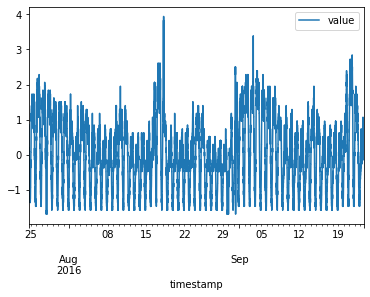

In [4]:
s.plot()

In [5]:
from adtk.data import validate_series
# This functoin will check some common critical issues of time series that may cause problems if anomaly detection is performed without fixing them. The function will automatically fix some of them and raise errors for the others.
# Issues will be checked and automatically fixed include:
# Time index is not monotonically increasing;
# Time index contains duplicated time stamps (fix by keeping first values);
# (optional) Time index attribute freq is missed while the index follows a frequency;
# (optional) Time series include categorical (non-binary) label columns (to fix by converting categorical labels into binary indicators).

s = validate_series(s)

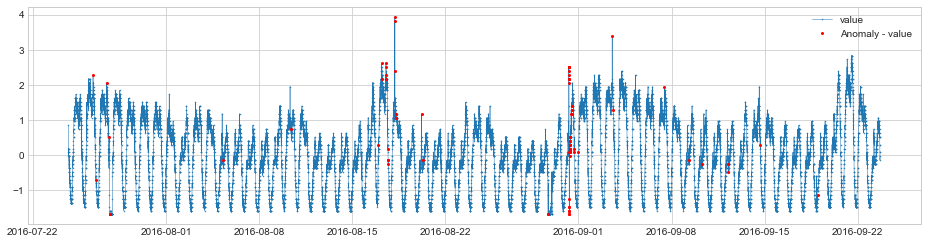

In [17]:
from adtk.detector import AutoregressionAD
from adtk.visualization import plot
autoregression_ad = AutoregressionAD(n_steps=10, step_size=20, c=3.0)
anomalies = autoregression_ad.fit_detect(s)
plot(s, anomaly=anomalies, ts_markersize=1, anomaly_color='red', anomaly_tag="marker", anomaly_markersize=2);

In [9]:
# n_steps (int, optional) – Number of steps (previous values) to include in the model. Default: 1.

# step_size (int, optional) – Length of a step. For example, if n_steps=2, step_size=3, X_[t-3] and X_[t-6] will be used to predict X_[t]. Default: 1.

# regressor (object, optional) – Regressor to be used. Same as a scikit-learn regressor, it should minimally have fit and predict methods. If not given, a linear regressor will be used.

# c (float, optional) – Factor used to determine the bound of normal range based on historical interquartile range. Default: 3.0.